# Multi-faceted Analysis and Classification of Spotify Tracks

Hello there! 👋
Welcome to my super-awesome-not-so-boring project based on classifying Spotify tracks using sklearn. Please click on the pop-up play button on the left of the code block to run, and make sure to run them in order as to not cause any errors from missing libraries! Thank you! -Anu

## Data exploration/visualization.
In this section, we take a closer look at the data, checking out things like the variety of music genres, how popular the songs are, and some other important characteristics.

In [5]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from statistics import median, mode

Mounting the data here.

In [6]:
data = pd.read_csv('/content/dataset.csv')
data.head(20)

Unnamed: 0                track_id                               artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9            9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
13          13  0X9MxHR1rTkEHDjp95F2OO                         Anna Hamilton   
14          14  4LbWtBkN82ZRhz9jqzgrb3              Chord Overstreet;Deepend   
15          15  1KHdq8NK9QxnGjdXb55NiG                           Landon Pigg   
16          16  6xKeQgzfjixSUld14qUezm                  Andrew Foy;Renee Foy   
17          17  4Yo0igmcoNyat1secaH0OD                  Andrew Foy;Renee Foy   
18          18  2qLMf6TuEC3ruGJg4SMMN6             Jason Mraz;Colbie Caillat   
19          19  6CgNoAbFJ4Q4Id4EjtbXlC               Boyce Avenue;Bea Miller   

                                           album_name  \
0                                              Comedy   
1                                    Ghost (Acoustic)   
2                                      To Begin Again   
3   Crazy Rich Asians (Original Motion Picture Sou...   
4                                             Hold On   
5                                Days I Will Remember   
6                         Is There Anybody Out There?   
7                 We Sing. We Dance. We Steal Things.   
8                 We Sing. We Dance. We Steal Things.   
9                                              Hunger   
10                                            Episode   
11                         Love Is a Four Letter Word   
12                                               Solo   
13                                           Bad Liar   
14                                    Hold On (Remix)   
15                                  The Boy Who Never   
16                              ily (i love you baby)   
17                                        At My Worst   
18                We Sing. We Dance. We Steal Things.   
19                             Cover Sessions, Vol. 4   

                          track_name  popularity  duration_ms  explicit  \
0                             Comedy          73       230666     False   
1                   Ghost - Acoustic          55       149610     False   
2                     To Begin Again          57       210826     False   
3         Can't Help Falling In Love          71       201933     False   
4                            Hold On          82       198853     False   
5               Days I Will Remember          58       214240     False   
6                      Say Something          74       229400     False   
7                          I'm Yours          80       242946     False   
8                              Lucky          74       189613     False   
9                             Hunger          56       205594     False   
10              Give Me Your Forever          74       244800     False   
11                   I Won't Give Up          69       240165     False   
12                              Solo          52       198712     False   
13                          Bad Liar          62       248448     False   


Now that we have successfully accessed the dataset, we will do some exploring/visualization.🫡


### Visualization: Song distribution
Let's visualize every aspect of the dataset we have into histograms and plots. Here we are starting with the number of songs in each genre, to check if the dataset is evenly sampled.

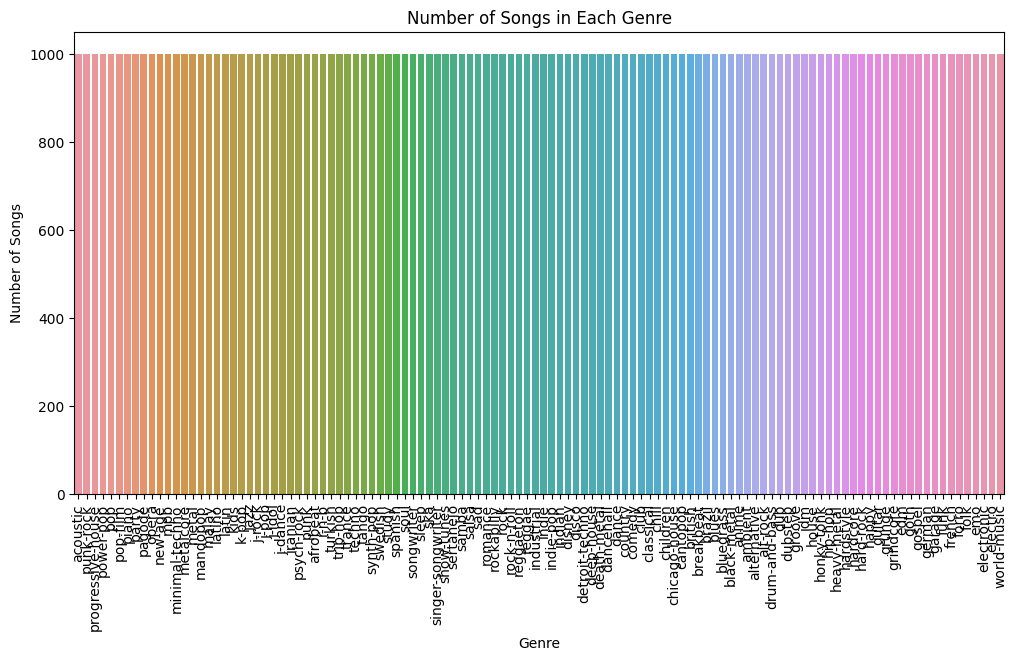

In [7]:
# Visualize the distribution of songs in each genre
plt.figure(figsize=(12, 6))
sns.countplot(x='track_genre', data=data, order=data['track_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in Each Genre')
plt.show()

We can see here that the sampling went well, and let's move onto our histograms of attributes. We are good to go.

### Visualization: Distribution of popularity scores

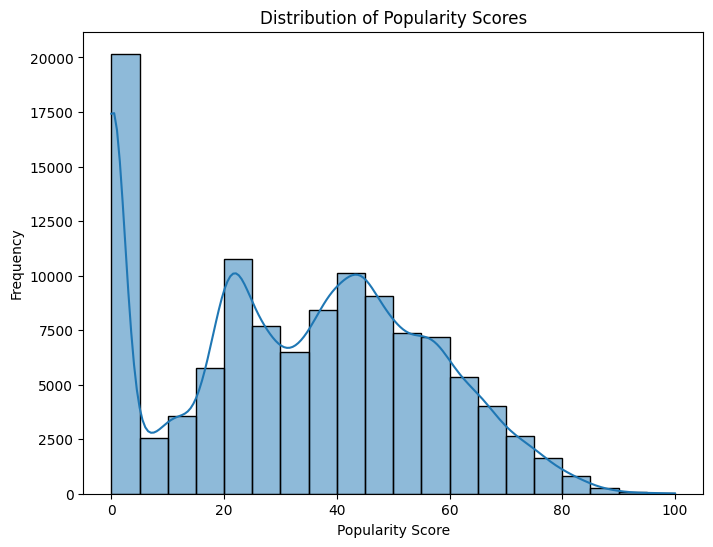

In [8]:
# Visualize the distribution of popularity scores
plt.figure(figsize=(8, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')
plt.show()

Here we have the popularity scores. Here we can see a stark contrast in what you usually see in balanced datasets. Usually the case is during sampling, this is expected to be a normal distribution, but surprisingly our dataset has a lot more unpopular songs in it than usual. We can also see a peak in the score ranges 20-30, which might be a suggestive indicator as to how the online streaming platforms’ library looks like.   
### Visualization: Distribution of danceability scores

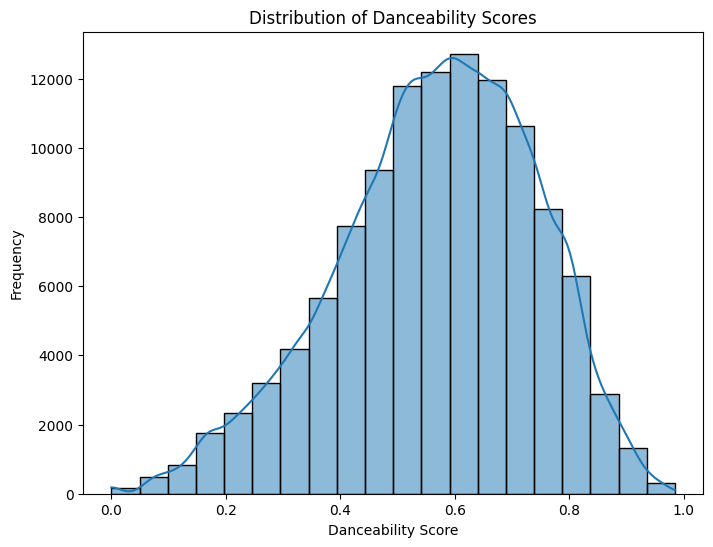

In [9]:
# Visualize the distribution of danceability scores
plt.figure(figsize=(8, 6))
sns.histplot(data['danceability'], bins=20, kde=True)
plt.xlabel('Danceability Score')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability Scores')
plt.show()

Here we see a handy histogram about danceability scores! 💃🕺🪩 It shows that most of the songs in this dataset have a somewhat right-skewed distribution with a peak around 0.6. We can assume that most of the songs tend to have a higher danceability value, but not all.
### Visualization: Distribution of energy scores


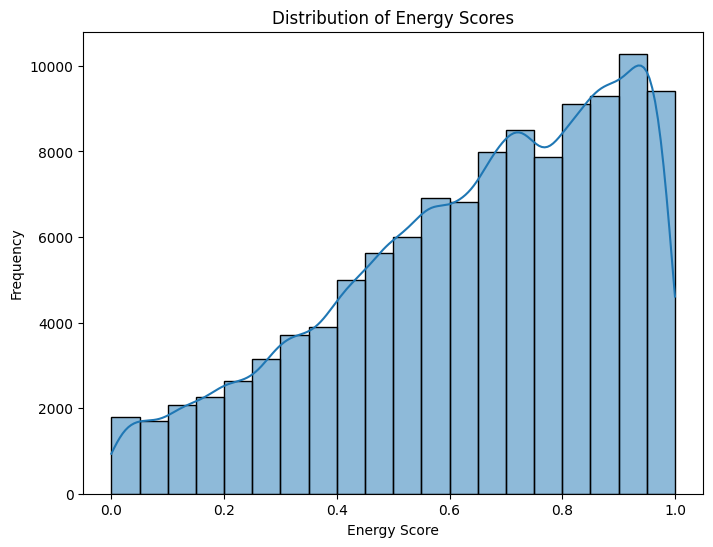

In [10]:
# Visualize the distribution of energy scores
plt.figure(figsize=(8, 6))
sns.histplot(data['energy'], bins=20, kde=True)
plt.xlabel('Energy Score')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Scores')
plt.show()

This is a histogram of the Energy score of the overall sample. Here we see a right-skew histogram. Higher energy songs take up most of the dataset as we can see here, so this might affect other aspects of the analysis such as time signature, energy etc. which we will investigate later on with a correlation analysis.
### Visualization: Distribution of valence scores

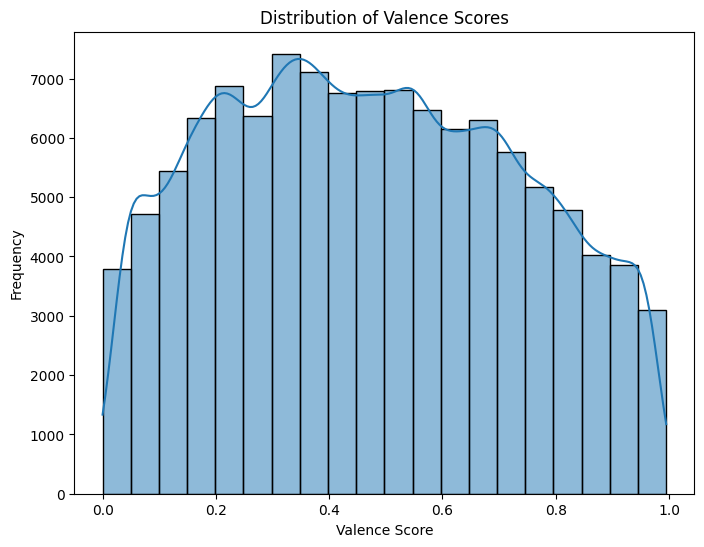

In [11]:
# Visualize the distribution of valence scores
plt.figure(figsize=(8, 6))
sns.histplot(data['valence'], bins=20, kde=True)
plt.xlabel('Valence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Valence Scores')
plt.show()

Valence is the score of positive and negative feeling each track exudes. This means 0.0 would indicate tracks that evoke feelings of sadness while 1.0 might be euphoric. It seems that our sample contains a slightly left skewed or slightly more moody songs compared to more happier songs.
### Visualization: Distribution of track lengths

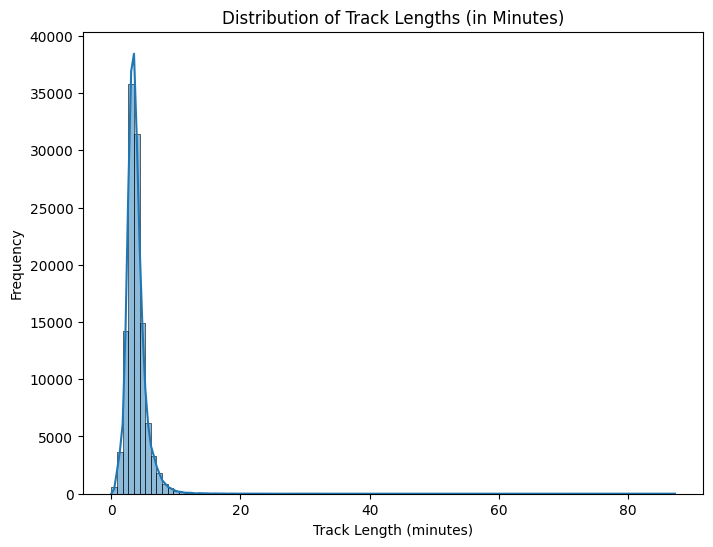

In [12]:
# Convert duration from milliseconds to minutes
data['duration_minutes'] = data['duration_ms'] / 60000  # 1 minute = 60,000 milliseconds
# Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['duration_minutes'], bins=100, kde=True)
plt.xlabel('Track Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Track Lengths (in Minutes)')
plt.show()

Here we see a sharp decline from the initial rise at the start of the histogram at 0. There is a frop around the 5-10mins. We can see here that most tracks are around the 0-20 minute mark. Let's zoom in so that we can focus on the songs that are 0-10 minutes long only.

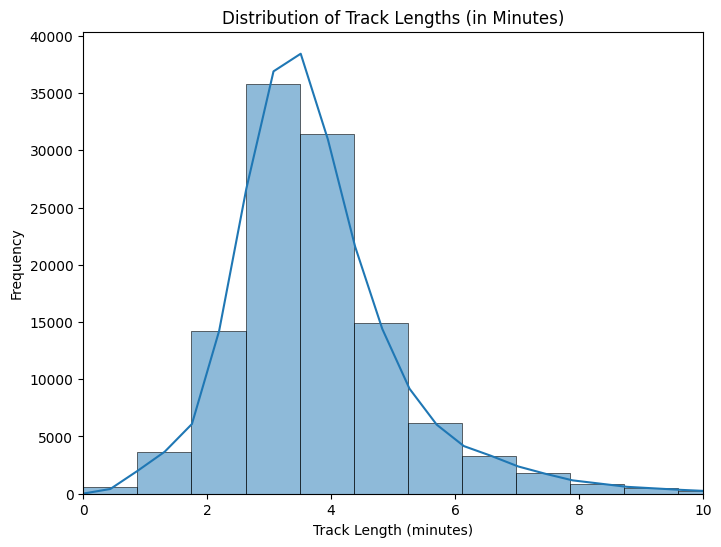

In [13]:
# Convert duration from milliseconds to minutes
data['duration_minutes'] = data['duration_ms'] / 60000  # 1 minute = 60,000 milliseconds
plt.figure(figsize=(8, 6))
sns.histplot(data['duration_minutes'], bins=100, kde=True)
plt.xlabel('Track Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Track Lengths (in Minutes)')
plt.xlim(0, 10)
plt.show()


Here we can see that most tracks are around 3-4 minutes long. Let's try to calculate the median, mode and average to echo this statement.

In [14]:
# Stats 101
data['duration_minutes'] = data['duration_ms'] / 60000
average_duration_minutes = data['duration_minutes'].mean()
median_duration_minutes = median(data['duration_minutes'])
mode_duration_minutes = mode(data['duration_minutes'])
print(f'The average value is {average_duration_minutes}, median value is {median_duration_minutes}, and the mode is {mode_duration_minutes}.')

The average value is 3.8004858852339187, median value is 3.5484333333333336, and the mode is 2.71495.


It seems like we were on the nose! Onwards to more visualizations.
### Visualization: Explicit vs. Non-Explicit songs

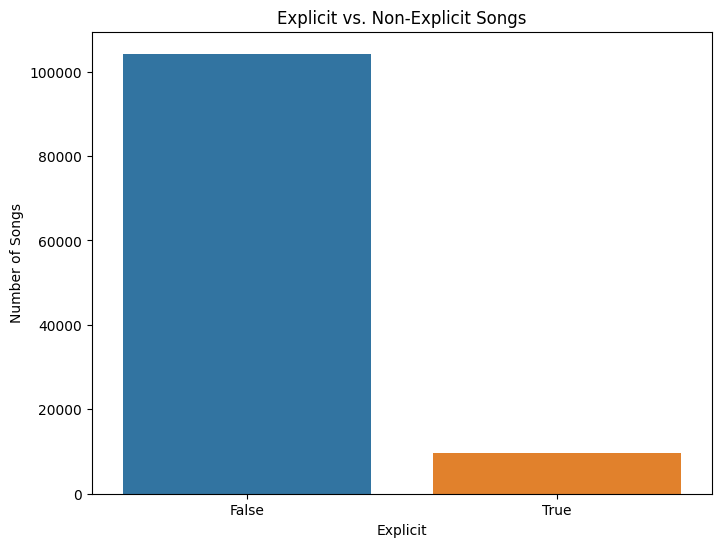

In [15]:
#num of songs/explicit
plt.figure(figsize=(8, 6))
sns.countplot(x='explicit', data=data)
plt.xlabel('Explicit')
plt.ylabel('Number of Songs')
plt.title('Explicit vs. Non-Explicit Songs')
plt.show()

In order to keep the platform profitable to younger users, companies might look into how much of the database has explicit versions and how many have radio edit versions. Above, we can find that most of the songs in the dataset are non-explicit.
### Visualization: Distribution of Tempo

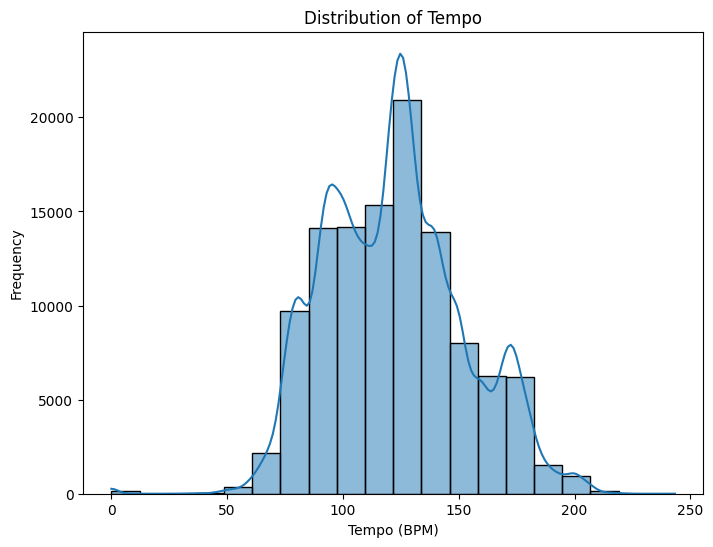

In [16]:
#tempo
plt.figure(figsize=(8, 6))
sns.histplot(data['tempo'], bins=20, kde=True)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.title('Distribution of Tempo')
plt.show()

In this figure, the overall tempo of tracks in the dataset seem to peak at 100 and 140 bpm.

In [17]:
#tempo by genre: Techno
query_data = data[data['track_genre'] == 'jazz']
average_techno_tempo = query_data['tempo'].mean()
print("Average Tempo for Techno Genre:", average_techno_tempo)

Average Tempo for Techno Genre: 112.63646899999999


We can also look into the tempo metrics of individual genres.

In [18]:
#tempo for every genre
average_tempo_by_genre = data.groupby('track_genre')['tempo'].mean()
print(average_tempo_by_genre)

track_genre
acoustic       119.010624
afrobeat       119.213337
alt-rock       124.634404
alternative    122.232394
ambient        111.113129
                  ...    
techno         128.255482
trance         133.276726
trip-hop       118.743616
turkish        120.367607
world-music    121.393711
Name: tempo, Length: 114, dtype: float64


Or all of them.
### Visualization: Time signatures

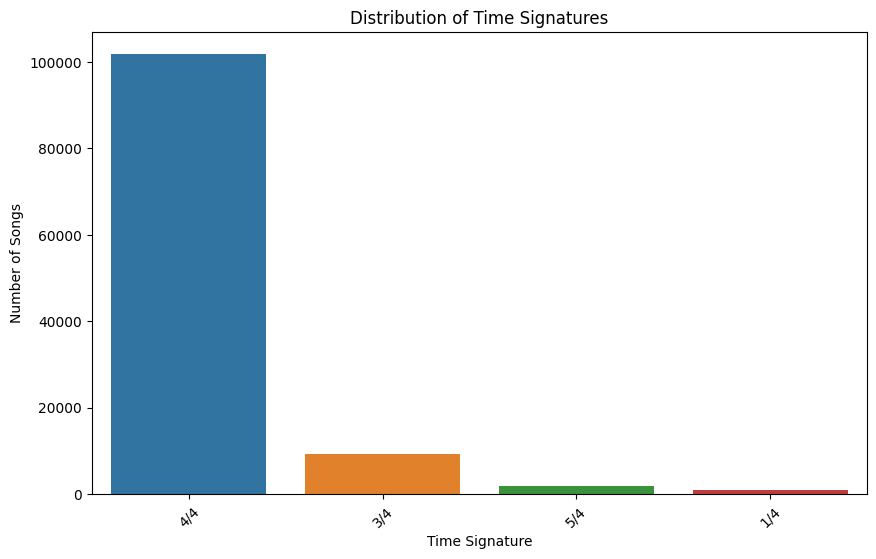

In [19]:
#time signature
time_signature_mapping = {
    1: '1/4',
    3: '3/4',
    4: '4/4',
    5: '5/4',
    7: '7/4'
}

data['time_signature'] = data['time_signature'].map(time_signature_mapping)
plt.figure(figsize=(10, 6))
sns.countplot(x='time_signature', data=data, order=data['time_signature'].value_counts().index)
plt.xlabel('Time Signature')
plt.ylabel('Number of Songs')
plt.title('Distribution of Time Signatures')
plt.xticks(rotation=45)
plt.show()

From this plot, we can see that 4/4 time signature is the most common time signature to have among the tracks, followed by 3/4 and some 5/4 and 1/4.

## Feature engineering

In this task we will: change the explicit column to 0/1s, and extract the primary artist for all songs from a list of artists.

### Primary artist extraction

In [20]:
# primary artist
def extract_primary_artist(artist_string):
    if pd.isna(artist_string):
        return artist_string
    artists = artist_string.split(';')
    return artists[0].strip()

data['primary_artist'] = data['artists'].apply(extract_primary_artist)
print(data.head())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


With a delimiter of ';', we have now extracted the primary creators for each track.
### 'Explicit' column: boolean value to 1/0s

In [21]:
# explicit column from boolean to 0/1s
data['explicit'] = data['explicit'].fillna(False).astype(int) #includes NaN
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love          71       201933         0   
4                     Hold On          82       198853         0   

   danceability  energy  ...  speechiness  acousticness  instrumentalness  \
0         0.676  0.4610  ...       0.1430        0.0322          0.000001   
1         0.420  0.1660  ...       0.0763        0.9240          0.000006   
2         0.438  0.3590  ...       0.0557        0.2100          0.000000   
3         0.266  0.0596  ...       0.0363        0.9050          0.000071   
4         0.618  0.4430  ...       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre  duration_minutes  \
0    0.3580    0.715   87.917             4/4     acoustic          3.844433   
1    0.1010    0.267   77.489             4/4     acoustic          2.493500   
2    0.1170    0.120   76.332             4/4     acoustic          3.513767   
3    0.1320    0.143  181.740             3/4     acoustic          3.365550   
4    0.0829    0.167  119.949             4/4     acoustic          3.314217   

      primary_artist  
0        Gen Hoshino  
1       Ben Woodward  
2  Ingrid Michaelson  
3       Kina Grannis  
4   Chord Overstreet  

[5 rows x 23 columns]

As we can see, we have successfully converted the False=0, True=1. Let's move onto the next chapter.



## Data Visualization
In this chapter, we will:
*   plot distributions of audio features in different genres
*   visualize the correlation between features
*   use cool dimensionality reduction techniques like PCA or t-SNE to visualize clusters of songs in a 2D space

### Audio features in different genres

In [22]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os

features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'explicit', 'liveness', 'valence', 'time_signature']

fig = make_subplots(cols=4, rows=3, subplot_titles=features)
for i, feature in enumerate(features):
    fig.add_trace(go.Histogram(x=data[feature], name=feature), row=i//4 + 1, col=i%4 + 1)

width = 1000
height = 800

fig.update_layout(width=width, height=height, title='Feature Distribution')


And here is my favorite genre: Techno, under the same lens of different classes we just explored.

In [23]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'explicit', 'liveness', 'valence', 'time_signature']

fig = make_subplots(cols=4, rows=3, subplot_titles=features)

for i, feature in enumerate(features):
    fig.add_trace(go.Histogram(x=data[data['track_genre'] == 'techno'][feature], name=feature), row=i//4 + 1, col=i%4 + 1)

width = 1000
height = 800

fig.update_layout(width=width, height=height, title='Feature Distribution in Techno Genre')
fig.show()


Here we can see key features spread throughout the dataset. Analyses were discussed prior in part one of this docket. Please scroll up for reference. Boolean and categorical values in this visualization are: time signature, explicit, and key.

The genre's popularity and
### Correlation Heatmap

In [24]:
import plotly.express as px
correlation_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
            'loudness', 'valence', 'tempo', 'time_signature']
fig = px.imshow(data[correlation_features].corr())
fig.update_layout(title='Feature Correlation Heatmap')
fig.show()


<ipython-input-24-497131c2eeb5>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



For the most part, the heatmap of correlation shows blue (x<0.5) so we will disregard values of small significance. However, two notable correlation factors emerge: the relationship between energy-loudness (0.76). A notable relationship of features could be danceability-valence at only (0.47). Some negative correlations are seen throughout the plot (valence-duration, danceability-duration, explicit-duration). Since a high correlation feature relationship indicates the information they both provide is similar, let's drop one of them - loudness.

In [25]:
# drop loudness
data.drop('loudness', axis=1, inplace=True)
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love          71       201933         0   
4                     Hold On          82       198853         0   

   danceability  energy  ...  speechiness  acousticness  instrumentalness  \
0         0.676  0.4610  ...       0.1430        0.0322          0.000001   
1         0.420  0.1660  ...       0.0763        0.9240          0.000006   
2         0.438  0.3590  ...       0.0557        0.2100          0.000000   
3         0.266  0.0596  ...       0.0363        0.9050          0.000071   
4         0.618  0.4430  ...       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre duration_minutes  \
0    0.3580    0.715   87.917             4/4     acoustic         3.844433   
1    0.1010    0.267   77.489             4/4     acoustic         2.493500   
2    0.1170    0.120   76.332             4/4     acoustic         3.513767   
3    0.1320    0.143  181.740             3/4     acoustic         3.365550   
4    0.0829    0.167  119.949             4/4     acoustic         3.314217   

      primary_artist  
0        Gen Hoshino  
1       Ben Woodward  
2  Ingrid Michaelson  
3       Kina Grannis  
4   Chord Overstreet  

[5 rows x 22 columns]

Now that we dropped loudness, let's try again.

In [26]:
import plotly.express as px
correlation_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
             'valence', 'tempo', 'time_signature']
fig = px.imshow(data[correlation_features].corr())
fig.update_layout(title='Feature Correlation Heatmap')
fig.show()


<ipython-input-26-7416c13cf1c5>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Looks great! Onwards to newer territories.


### PCA: The saga



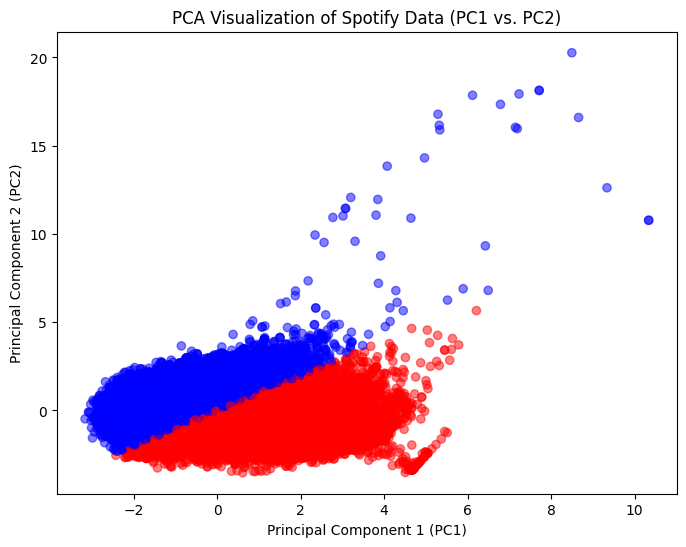

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv('dataset.csv')
selected_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'valence', 'tempo']
X = data[selected_features]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

n_components = 2  # 2-D
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X_std)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i + 1}' for i in range(n_components)])
colors = np.where(pca_df['PC1'] >= pca_df['PC2'], 'r', 'b')
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Visualization of Spotify Data (PC1 vs. PC2)')
plt.show()


In [28]:
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings, columns=selected_features, index=[f'PC{i + 1}' for i in range(n_components)])
print("PC1:")
print(loadings_df.loc['PC1'])
print("PC2")
print(loadings_df.loc['PC2'])


PC1:
popularity      0.003075
duration_ms     0.171931
danceability   -0.568763
energy         -0.432182
valence        -0.650740
tempo          -0.191560
Name: PC1, dtype: float64
PC2
popularity      0.005381
duration_ms     0.428968
danceability   -0.311725
energy          0.510020
valence        -0.147484
tempo           0.660994
Name: PC2, dtype: float64


PC1 seems to contain features related to danceability, energy, and valence, while PC2 contains features like duration, energy, and tempo.

## Creating a Recommendation system
In this chapter we will:
   - Create a content-based recommendation system that suggests songs similar to a given song based on audio features.

   - Use cosine similarity or other distance metrics to find songs with similar feature vectors.


### Fetching 'track_id'
Let's build a quick script to fetch us the track_id.

In [29]:
# Song title
song_title = "I'm Yours"  # CHANGE HERE!!

# search
matching_songs = data[data['track_name'].str.contains(song_title, case=False, na=False)]
top_10_matching_songs = matching_songs[['track_name', 'artists', 'track_id']][:10]
print("Top 10 matching songs:")
print(top_10_matching_songs)


Top 10 matching songs:
                                               track_name          artists  \
7                                               I'm Yours       Jason Mraz   
20                                              I'm Yours       Jason Mraz   
162                                             I'm Yours       Jason Mraz   
303                                  I'm Yours - Acoustic          Lusaint   
17146   Signed Sealed Delivered I'm Yours (Glee Cast V...        Glee Cast   
25200                                      Baby I'm Yours  Breakbot;Irfane   
38007                                      Baby I'm Yours   Arctic Monkeys   
82448                                   Take Me I'm Yours          Squeeze   
91904                                           I'm Yours       Jason Mraz   
107846                                  Take Me I'm Yours          Squeeze   

                      track_id  
7       1EzrEOXmMH3G43AXT1y7pA  
20      3S0OXQeoh0w6AY8WQVckRW  
162     03yc0G2OoH1

Now we can move onto the next hurdle: finding recommendations.

###  Recommending with cosine similarity
Here we're gonna use almost all of the features to get the best recommendations.

In [30]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
selected_features = ['tempo', 'danceability', 'energy', 'valence', 'duration_ms', 'popularity', 'speechiness', 'liveness', 'acousticness', 'instrumentalness']
# track ID
reference_track_id = "3S0OXQeoh0w6AY8WQVckRW"  # CHANGE HERE!! - Jason Mraz I'm yours
reference_song = data[data['track_id'] == reference_track_id]
scaler = StandardScaler()
X = scaler.fit_transform(data[selected_features])
# cosine similarity
cosine_sim = cosine_similarity([X[reference_song.index[0]]], X)
similarity_scores = pd.DataFrame(data={'Track Name': data['track_name'], 'Artists': data['artists'], 'Similarity Score': cosine_sim[0]})
similar_songs = similarity_scores.sort_values(by='Similarity Score', ascending=False)
N = 10 # number of songs
top_n_recommendations = similar_songs.head(N)
print(f"We found {N} songs similar to this:")
for index, row in top_n_recommendations.iterrows():
    print(f"{row['Artists']} - {row['Track Name']}")


We found 10 songs similar to this:
Jason Mraz - I'm Yours
Jason Mraz - I'm Yours
Jason Mraz - I'm Yours
Jason Mraz - I'm Yours
Old Crow Medicine Show - Wagon Wheel
Jarabe De Palo - Agua
Yuvan Shankar Raja;Aditi Shankar - Madura Veeran
Yuvan Shankar Raja;Aditi Shankar - Madura Veeran
Yuvan Shankar Raja;Aditi Shankar - Madura Veeran
ヨルシカ - チノカテ


Here it says the closest song to Jason Mraz's I'm Yours is this song: [Old Crow Medicine Show - Wagon Wheel](https://youtu.be/1gX1EP6mG-E)
After playing around with the features, this is a promising result! The banjo and 4/4 time signature matches Jason Mraz's guitar strut and happy-go-lucky song well.

## Classification Based on Audio Features
In this task, we will split the data into training and test sets, and train various classifiers like Random Forest, Gradient Boosting and Neural Networks to predict the genre of a track based on its audio features. We will then evaluate the models using different measurements.

### Random Forest classifier
RF is a method that combines multiple decision trees to make better decisions.

In [31]:

X = data.iloc[:5000].drop(['track_genre'], axis=1)  # features
y = data.iloc[:5000]['track_genre']  # target
#randomize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

X_train = X_train[numeric_features]
X_test = X_test[numeric_features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report)
print('Confusion Matrix:\n', confusion_mat)


Accuracy: 0.647
Classification Report:
               precision    recall  f1-score   support

    acoustic       0.80      0.80      0.80       216
    afrobeat       0.86      0.91      0.88       190
    alt-rock       0.31      0.34      0.33       192
 alternative       0.38      0.34      0.36       210
     ambient       0.88      0.86      0.87       192

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.64      0.65      0.64      1000

Confusion Matrix:
 [[173  16   9   3  15]
 [  9 173   1   2   5]
 [  7   8  65 109   3]
 [  9   1 129  71   0]
 [ 19   4   4   0 165]]


Here it shows us that the accuracy of the model is 64.7% of the test data, and the precision for each genres are listed as such: acoustic - 0.80 = 80% of the predictions were correct. Recall/senstivity can also be read the same. F1 scores show us a balance between precision and recall. The confusion matric lists counts of true positives, false positives, false negatives and true negatives in that order.

### Gradient boosting
 GB is a method that builds an array of sequentially connected decision trees where each new tree corrects the errors of the previous ones.

In [32]:

subset_data = data.iloc[:5000]

X = subset_data.drop(['track_genre'], axis=1)  # features
y = subset_data['track_genre']  # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

X_train = X_train[numeric_features]
X_test = X_test[numeric_features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)

print('Gradient Boosting Classifier Results:')
print(f'Accuracy: {accuracy_gb}')
print('Classification Report:\n', classification_report_gb)
print('Confusion Matrix:\n', confusion_mat_gb)


Gradient Boosting Classifier Results:
Accuracy: 0.667
Classification Report:
               precision    recall  f1-score   support

    acoustic       0.77      0.77      0.77       216
    afrobeat       0.86      0.87      0.87       190
    alt-rock       0.39      0.41      0.40       192
 alternative       0.47      0.44      0.45       210
     ambient       0.85      0.85      0.85       192

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
 [[167  13  11   8  17]
 [ 12 166   3   1   8]
 [  9   6  78  96   3]
 [  9   1 107  92   1]
 [ 19   6   3   0 164]]


The accuracy of the model was 66.7% which means it cirrectly classified 66.7% of the test data.
Its precision can be deciphered as such: for each genre, there is a percentage of correct predictions. (e.g.: acoustic genre: 77%) Its recall/sensitivity tells us how well the model identifies all positives. The F1 score shows a harmonic mean of the previous two and tells us of the false positive - false negative ratio.

### Feedforward Neural Network (FNN)
FNN is a type of supervised learning where information goes in one direction, from input to output only without recurring connections.

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

subset_data = data.iloc[:5000]

X = subset_data.drop(['track_genre'], axis=1)  # features
y = subset_data['track_genre']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

numeric_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

X_train = X_train[numeric_features]
X_test = X_test[numeric_features]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(len(numeric_features),)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


y_train_onehot = keras.utils.to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
model.fit(X_train, y_train_onehot, epochs=20, batch_size=32, validation_data=(X_test, y_test_onehot))

loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
classification_report = classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_)
confusion_mat = confusion_matrix(y_test, y_pred_labels)
print('Classification Report:\n', classification_report)
print('Confusion Matrix:\n', confusion_mat)


Epoch 1/20
125/125 [==============================] - 2s 5ms/step - loss: 1.1624 - accuracy: 0.5400 - val_loss: 1.0013 - val_accuracy: 0.6050
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.6192 - val_loss: 0.9395 - val_accuracy: 0.6230
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.8777 - accuracy: 0.6367 - val_loss: 0.9050 - val_accuracy: 0.6270
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.6470 - val_loss: 0.8671 - val_accuracy: 0.6380
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.6668 - val_loss: 0.8184 - val_accuracy: 0.6540
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.7324 - accuracy: 0.6827 - val_loss: 0.7846 - val_accuracy: 0.6730
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6941 - accuracy: 0.6955 - val_loss: 0.7565 - val_accuracy: 0.6790
Epoch 

The method's precision gives out genre specific precision, recall and F1 scores in detail. The method achieved an overall accuracy of 67% - where 67 out of 100 rows were correctly classified.

### The Multi-Layer Perceptron (MLP)
MLP is an artificial neural network that consists of multiple layers of interconnected neurons.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
subset_data = data.iloc[:5000]

X = subset_data.drop(['track_genre'], axis=1)  # features
y = subset_data['track_genre']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

X_train = X_train[numeric_features]
X_test = X_test[numeric_features]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('MLP Classifier Results:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report)
print('Confusion Matrix:\n', confusion_mat)


MLP Classifier Results:
Accuracy: 0.605
Classification Report:
               precision    recall  f1-score   support

    acoustic       0.68      0.65      0.66       216
    afrobeat       0.79      0.82      0.80       190
    alt-rock       0.33      0.37      0.35       192
 alternative       0.44      0.37      0.40       210
     ambient       0.80      0.83      0.82       192

    accuracy                           0.60      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.60      0.60      0.60      1000

Confusion Matrix:
 [[140  23  23   6  24]
 [ 19 156   5   2   8]
 [ 17   9  71  91   4]
 [  9   3 117  78   3]
 [ 22   7   2   1 160]]


## Analysis of 'popularity'
Here we will analyse how the 'popularity' class interacts with other variables with a regression model.

Linear regression is a method where we model the relationship between a dependent variable and other independent variables by fitting a linear equation into it.


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
numeric_features = ['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
X = data[numeric_features]
X_train, X_test, y_train, y_test = train_test_split(X.drop('popularity', axis=1), X['popularity'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 18.33544722133117
Mean Squared Error: 482.3815543476193
Root Mean Squared Error: 21.963186343233975
R-squared: 0.022491916615504093


We have a really bad R squared score here so it probably is a bad model. If linear regression isn't capturing the trend then let's try polynomial regression.

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

numeric_features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
X = data[numeric_features]
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 17.77754775687049
Mean Squared Error: 466.14194833731824
Root Mean Squared Error: 21.590320709459558
R-squared: 0.05540019431181331


 Let's try logistic regression.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

numeric_features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
X = data[numeric_features]
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mat)


Accuracy: 0.1406140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.14      1.00      0.25      3214
           1       0.00      0.00      0.00       448
           2       0.00      0.00      0.00       209
           3       0.00      0.00      0.00       127
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00        80
           7       0.00      0.00      0.00        85
           8       0.00      0.00      0.00       111
           9       0.00      0.00      0.00       105
          10       0.00      0.00      0.00       135
          11       0.00      0.00      0.00       162
          12       0.00      0.00      0.00       171
          13       0.00      0.00      0.00       141
          14       0.00      0.00      0.00       117
          15       0.00      0.00      0.00       132
          16       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/l

Let's try decision tree:



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
numeric_features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
X = data[numeric_features]
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 13.111273283423996
Mean Squared Error: 429.189403192358
Root Mean Squared Error: 20.716886908808426
R-squared: 0.1302816056246492


## Genre-based Analysis
We are goint to analyze the average values of features like danceability, energy, and valence for each genre and identify genres that are more energetic, danceable, or have higher speechiness.


In [39]:
import pandas as pd
genre_avg = data.groupby('track_genre')[['danceability', 'energy', 'valence']].mean()
print(genre_avg)

             danceability    energy   valence
track_genre                                  
acoustic         0.549593  0.435368  0.424023
afrobeat         0.669580  0.702812  0.698619
alt-rock         0.534493  0.754173  0.518260
alternative      0.559927  0.720030  0.495570
ambient          0.367867  0.237162  0.167498
...                   ...       ...       ...
techno           0.684348  0.746413  0.321878
trance           0.583409  0.845272  0.276881
trip-hop         0.634695  0.622363  0.478069
turkish          0.616077  0.609804  0.462314
world-music      0.414572  0.532987  0.250295

[114 rows x 3 columns]


In [40]:
import pandas as pd
top_danceability = genre_avg.sort_values(by='danceability', ascending=False).head(5)
top_energy = genre_avg.sort_values(by='energy', ascending=False).head(5)
top_valence = genre_avg.sort_values(by='valence', ascending=False).head(5)
print("Top 5 Genres by Danceability:")
print(top_danceability)
print("\nTop 5 Genres by Energy:")
print(top_energy)
print("\nTop 5 Genres by Valence:")
print(top_valence)


Top 5 Genres by Danceability:
               danceability    energy   valence
track_genre                                    
kids               0.778906  0.613129  0.680864
chicago-house      0.766176  0.733215  0.586541
reggaeton          0.758521  0.738728  0.642753
latino             0.757057  0.731797  0.630201
reggae             0.745331  0.725791  0.647529

Top 5 Genres by Energy:
             danceability    energy   valence
track_genre                                  
death-metal      0.368411  0.931470  0.247611
grindcore        0.271854  0.924201  0.216434
metalcore        0.423800  0.914485  0.314902
happy            0.552847  0.910971  0.327467
hardstyle        0.539229  0.901246  0.311888

Top 5 Genres by Valence:
             danceability    energy   valence
track_genre                                  
salsa            0.668288  0.724518  0.814838
forro            0.649776  0.789526  0.760693
rockabilly       0.561202  0.659372  0.726951
afrobeat         0.669580  0.70

In [41]:
most_energetic_genres = genre_avg.sort_values(by='energy', ascending=False)
most_danceable_genres = genre_avg.sort_values(by='danceability', ascending=False)
highest_valence_genres = genre_avg.sort_values(by='valence', ascending=False)
print("Most Energetic Genres:")
print(most_energetic_genres)
print("\nMost Danceable Genres:")
print(most_danceable_genres)
print("\nGenres with the Highest Valence:")
print(highest_valence_genres)


Most Energetic Genres:
             danceability    energy   valence
track_genre                                  
death-metal      0.368411  0.931470  0.247611
grindcore        0.271854  0.924201  0.216434
metalcore        0.423800  0.914485  0.314902
happy            0.552847  0.910971  0.327467
hardstyle        0.539229  0.901246  0.311888
...                   ...       ...       ...
disney           0.462874  0.302519  0.368557
romance          0.432133  0.294304  0.393415
ambient          0.367867  0.237162  0.167498
new-age          0.348455  0.214501  0.183167
classical        0.381923  0.189827  0.381050

[114 rows x 3 columns]

Most Danceable Genres:
               danceability    energy   valence
track_genre                                    
kids               0.778906  0.613129  0.680864
chicago-house      0.766176  0.733215  0.586541
reggaeton          0.758521  0.738728  0.642753
latino             0.757057  0.731797  0.630201
reggae             0.745331  0.725791  0.64

## Conclusions

During the course of the project I aimed to classify, analyze and eventually build a recommendation model and saw that in the initial stages, the genres contained each a 1000 songs in total, creating a great balance for further analysis. This structural distinction was combined with a concentration of popularity scores in the 20-30 range, providing insights into the composition of streaming music libraries. Key audio features such as danceability, energy, valence, duration, tempo, explicit content, and time signatures were examined to reveal the dataset's musical characteristics and demographic appeal.

I used data visualization methods to delve into genre-specific trends, which brought out distinctions in attributes like popularity, valence, and loudness. Tempo and time signature remained quite consistent across different genres. I also discovered that the Feedforward Neural Network (FNN) proved to be the most accurate classification model, achieving a commendable 68.8% accuracy, particularly excelling in identifying afrobeat and ambient genres. These results suggest possibilities for future research where we could focus on improving track popularity prediction models and as a consequence, helping Spotify and other platforms make better recommendation algorithms. These could hold the potential to help better music recommendation systems that are already in place, and help listeners discover new music.